<center><h1><b>HR Analytics Employee Attrition & Performance For Cluster (K-Prototype)</b></h1></center>

---




Dataset:
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

# Data Preparation

# Identification of Problems

### Point of Identification

1. **Tingkat Pergantian Karyawan (Attrition)**: Perlu dicari pola faktor yang mempengaruhi keputusan karyawan untuk berhenti.

2. **Faktor-Faktor Penyebab**: Faktor-faktor seperti jarak rumah ke kantor, masa kerja, keseimbangan kerja-hidup, pelatihan, dan promosi mungkin berpengaruh pada keputusan karyawan untuk keluar.

3. **Segmentasi Karyawan**: Penting mengidentifikasi kelompok karyawan yang berisiko tinggi berhenti untuk menyusun strategi retensi.

## Problem Solving Strategy

1. **Identifikasi Pola**: Clustering mengelompokkan karyawan berdasarkan karakteristik yang serupa untuk menemukan pola atau penyebab "Attrition".

2. **Strategi Retensi**: Membantu menyusun strategi retensi yang lebih efektif dan personal berdasarkan kelompok risiko.

3. **Efisiensi Keputusan**: Mempermudah pengelolaan karyawan secara lebih tepat dan berbasis data.

# Data Overview

| Column Name                | Description                                  |
|----------------------------|----------------------------------------------|
| Age                        | The age of the employee                      |
| Attrition                  | Whether the employee has left the company    |
| BusinessTravel             | Frequency of business travel                 |
| DailyRate                  | The daily rate of pay for the employee       |
| Department                 | Department in which the employee works       |
| DistanceFromHome           | Distance from home to work in miles          |
| Education                  | Level of education of the employee           |
| EducationField             | Field of education of the employee           |
| EnvironmentSatisfaction     | Satisfaction level with the work environment |
| Gender                     | Gender of the employee                       |
| HourlyRate                 | Hourly rate of pay for the employee          |
| JobInvolvement             | Level of job involvement                     |
| JobLevel                   | Level of job within the company              |
| JobRole                    | Role of the employee in the company          |
| JobSatisfaction            | Satisfaction level with the job              |
| MaritalStatus              | Marital status of the employee               |
| MonthlyIncome              | Monthly income of the employee               |
| MonthlyRate                | Monthly rate of pay for the employee         |
| NumCompaniesWorked         | Number of companies the employee has worked for |
| OverTime                   | Whether the employee works overtime or not   |
| PercentSalaryHike          | Percentage increase in salary                |
| PerformanceRating          | Performance rating of the employee           |
| RelationshipSatisfaction   | Satisfaction level with work relationships   |
| StockOptionLevel           | Level of stock option                        |
| TotalWorkingYears          | Total number of years worked                 |
| TrainingTimesLastYear      | Number of training sessions attended last year |
| WorkLifeBalance            | Level of work-life balance                   |
| YearsAtCompany             | Number of years spent at the company         |
| YearsInCurrentRole         | Number of years in the current role          |
| YearsSinceLastPromotion    | Number of years since the last promotion     |
| YearsWithCurrManager       | Number of years with the current manager     |


# Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut

## Import Library

Installing the `kmodes` Library

The `kmodes` library is used for clustering data that includes categorical and mixed types (categorical and numerical) using algorithms like K-Modes and K-Prototypes. These algorithms are especially useful when you want to perform clustering on datasets that contain both numerical and categorical features, which typical clustering algorithms (like K-Means) cannot handle effectively.




In [1]:
# Install library `kmodes`
!pip install kmodes

In [15]:
# Import essential libraries for data manipulation and numerical operations
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Import libraries for visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization

# Import libraries for statistical tests
from scipy.stats import chi2_contingency, pearsonr  # Chi-squared test, Pearson correlation

# Import libraries for scaling and dimensionality reduction
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Data scaling
from sklearn.decomposition import PCA  # Principal Component Analysis (PCA)

# Import libraries for clustering
from sklearn.cluster import KMeans  # K-Means clustering
from kmodes.kprototypes import KPrototypes  # K-Prototypes clustering (handles mixed data)

# Import libraries for evaluation metrics
from sklearn.metrics import silhouette_score, silhouette_samples  # Silhouette score (clustering performance)

# Import libraries for model selection
from sklearn.model_selection import train_test_split  # Splitting the dataset into training and test sets

# Import library for warnings
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings

# Optional: If using Google Colab, access files from Google Drive (only necessary in Colab environment)
from google.colab import drive  # Google Drive access

# Import OS for file management (optional, depending on environment)
import os  # Operating system utilities

## Load Dataset

In [16]:
# Force remount to refresh authentication
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [17]:
# Read the dataset from drive
df = pd.read_csv('/content/drive/MyDrive/Project (Portofolio)/HR Analytics Employee Attrition & Performance/hr-analytics-employee-attrition-and-Performance.csv')  # Read the file after mounting

# Adjust Pandas settings to display all columns in the output
pd.set_option('display.max_columns', None)

# Display the first 5 rows of the DataFrame:
df.head()  # Show the first 5 rows to get an overview of the data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Columns

In [18]:
# Access the column labels of the DataFrame (df)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Number of Rows and Columns

In [19]:
# Get the number of rows and columns:
num_rows, num_columns = df.shape  # Unpack the shape of the DataFrame into number of rows and columns

# Print the number of rows:
print("Number of rows:", num_rows)  # Output the number of rows

# Print the number of columns:
print("Number of columns:", num_columns)  # Output the number of columns

Number of rows: 1470
Number of columns: 35


## Duplicated Rows

In [20]:
# Count the number of duplicated rows in the DataFrame:
num_duplicated_rows = df.duplicated().sum()  # Calculate the number of duplicated rows

# Print the count of duplicated rows:
print("Duplicated Rows:", num_duplicated_rows)  # Output the count of duplicated rows

Duplicated Rows: 0


## Missing Value

In [21]:
# Count the number of missing values in each column:
df.isnull().sum()  # Returns the total number of missing (null) values for each column in the DataFrame

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


## Create Copy of Dataset

In [22]:
# Create a deep copy of the DataFrame (df) and assign it to df1
df1 = df.copy()  # This makes an independent copy of df, ensuring that changes to df1 do not affect df

## Data Processing

In [23]:
# Display the first 5 rows of the DataFrame (df1)
df1.head()  # Returns the first 5 rows by default, useful for quickly inspecting the data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Menghapus Kolum yang memiliki `Low Correlation` dengan target,yaitu: `Attrition`. Pengecekan korelasi sudah di lakukan pada notebook "Model of..." (sebelumnya)

In [24]:
# Drop specified columns from the DataFrame (df1) and apply the change in place
df1.drop(columns=[
    'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
    'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
    'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
    'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
    'StandardHours', 'TrainingTimesLastYear', 'WorkLifeBalance',
    'YearsSinceLastPromotion'
], inplace=True)  # Permanently removes the listed columns from df1


Columns After Corelation Check

In [48]:
# Print the number of rows in the DataFrame (df1)
print('Number of rows: ', df1.shape[0])  # df1.shape[0] returns the number of rows

# Print the number of columns in the DataFrame (df1)
print('Number of columns: ', df1.shape[1])  # df1.shape[1] returns the number of columns

# Print the column names of the DataFrame (df1) as a list
print('Column names: ', df1.columns.tolist())  # df1.columns.tolist() converts the column names into a list


Number of rows:  1470
Number of columns:  16
Column names:  ['Age', 'Attrition', 'Department', 'EducationField', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'cluster']


## Feature Engineering

### Handling Missing Value

In [26]:
# Count the number of missing (null) values in each column of the DataFrame (df1)
df1.isnull().sum()  # Returns the total number of null values per column in df1


,0
Age,0
Attrition,0
Department,0
EducationField,0
JobInvolvement,0
JobLevel,0
JobRole,0
MaritalStatus,0
MonthlyIncome,0
OverTime,0


tidak terdapat missing value pada kolom dataset

### Splitting Numerical Columns

In [27]:
# Splitting numeric columns and categorical columns

# Select numeric columns from df1 and store their names in num_columns
num_columns = df1.select_dtypes(include=np.number).columns.tolist()  # Includes columns with numeric data types

# Select categorical columns from df1 and store their names in cat_columns
cat_columns = df1.select_dtypes(include=['object']).columns.tolist()  # Includes columns with object (typically strings) data types

# Create a DataFrame with only numeric columns
HR_df_num = df1[num_columns]  # Contains only the numeric columns from df1

# Create a DataFrame with only categorical columns
HR_df_cat = df1[cat_columns]  # Contains only the categorical columns from df1

# Print the list of numeric column names
print('Num Columns : ', num_columns)  # Displays the numeric column names

# Print the list of categorical column names
print('Cat Columns : ', cat_columns)  # Displays the categorical column names


Num Columns :  ['Age', 'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']
Cat Columns :  ['Attrition', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']


## Scaling

In [28]:
# Initialize the StandardScaler, which standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()  # Creates an instance of StandardScaler

# Apply the scaler to the numeric columns (HR_df_num) and transform them
HR_df_num_scaled = scaler.fit_transform(HR_df_num)  # Scales the numeric data so that it has a mean of 0 and a standard deviation of 1


## PCA

Text(0, 0.5, 'Eigenvalues')

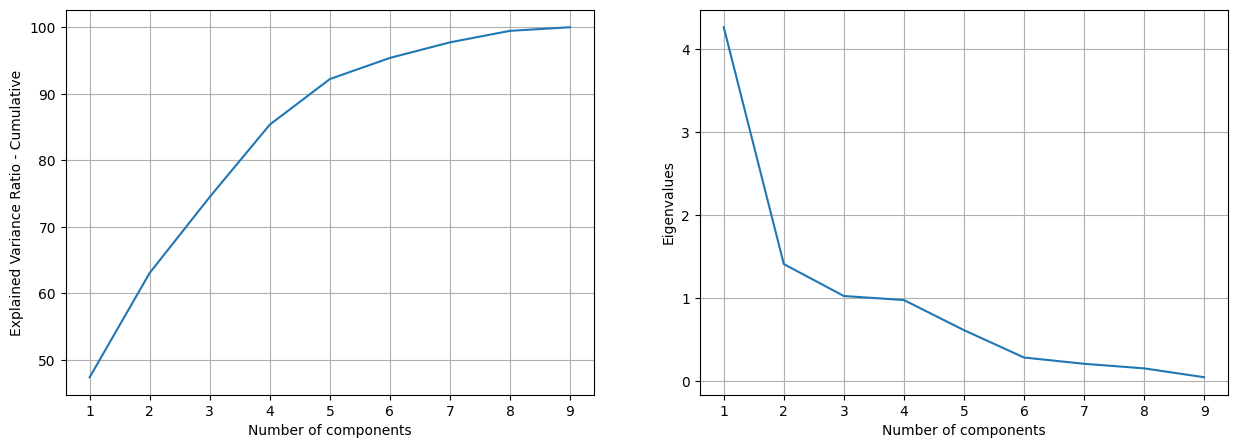

In [29]:
# Perform Principal Component Analysis (PCA)

# Initialize PCA (no specific number of components is defined, so it will consider all components)
pca = PCA()  # Creates an instance of PCA

# Fit the PCA model to the scaled numeric data (HR_df_num_scaled)
pca.fit(HR_df_num_scaled)  # This finds the principal components and explains the variance for each

# Plot the Cumulative Explained Variance Ratio
plt.figure(figsize=(15, 5))  # Set the figure size for the plots

# Subplot for the cumulative explained variance ratio
plt.subplot(1, 2, 1)  # Create a 1x2 grid of subplots, and use the first subplot
plt.grid()  # Add gridlines to the plot
# Plot the cumulative sum of the explained variance ratio (in percentage) against the number of components
plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')  # Label for the x-axis
plt.ylabel('Explained Variance Ratio - Cumulative')  # Label for the y-axis

# Plot the Eigenvalues (the amount of variance explained by each component)
plt.subplot(1, 2, 2)  # Use the second subplot for eigenvalues
plt.grid()  # Add gridlines to the plot
# Plot the eigenvalues (variance explained by each principal component) against the number of components
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_)
plt.xlabel('Number of components')  # Label for the x-axis
plt.ylabel('Eigenvalues')  # Label for the y-axis


In [32]:
# Check the number of features needed to retain 95% of the variance (information)

# Calculate the cumulative sum of the explained variance ratios for each principal component
cumsum = np.cumsum(pca.explained_variance_ratio_)  # This gives the cumulative variance explained by the components

# Find the index where the cumulative sum is greater than or equal to 95% (0.95) and add 1 (since indices start at 0)
num_features = np.argmax(cumsum >= 0.95) + 1  # This returns the number of features/components required to retain 95% of the variance

# Prints the number of features (principal components) required to retain 95% of the information
print(f"Number of principal components required to retain 95% of the information: {num_features}")


Number of principal components required to retain 95% of the information: 6


In [33]:
# Train the model using PCA with 95% of the original dataset information

# Initialize PCA with the number of components that retain approximately 95% of the information
pca = PCA(n_components=6)  # We set n_components to 6 based on the previous calculation

# Fit the PCA model to the scaled numeric data (HR_df_num_scaled)
pca.fit(HR_df_num_scaled)  # This fits the model to the data, reducing its dimensionality

# Apply the PCA transformation to the scaled numeric data
HR_df_num_scaled_pca = pca.transform(HR_df_num_scaled)  # This transforms the data into its principal components with reduced dimensions


In [34]:
# Concatenate PCA-transformed numeric columns and categorical columns

# Concatenate the PCA-transformed numeric data (HR_df_num_scaled_pca) and the original categorical data (HR_df_cat)
# along the columns (axis=1)
HR_df_final = np.concatenate([HR_df_num_scaled_pca, HR_df_cat], axis=1)  # Combines the PCA numeric and categorical columns

# Create a DataFrame from the concatenated data and set the column names
HR_df_final = pd.DataFrame(HR_df_final, columns=[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6'] + cat_columns])
# Column names include PCA components and the original categorical columns

# Convert the DataFrame's columns to appropriate data types where possible (for example, strings back to string type)
HR_df_final = HR_df_final.infer_objects()  # This infers the most specific dtype for each column

# Display the final DataFrame
HR_df_final  # Shows the final DataFrame with PCA and categorical columns


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,Attrition,Department,EducationField,JobRole,MaritalStatus,OverTime
0,-0.136588,-0.027805,-0.295553,-0.948067,0.395136,-0.114361,Yes,Sales,Life Sciences,Sales Executive,Single,Yes
1,0.916107,0.559142,-0.448874,0.840369,1.341523,0.053165,No,Research & Development,Life Sciences,Research Scientist,Married,No
2,-2.275383,-0.869961,-1.254935,0.056238,0.707496,-0.012552,Yes,Research & Development,Other,Laboratory Technician,Single,Yes
3,-1.095040,0.625411,-0.358193,-0.897016,0.316821,1.327750,No,Research & Development,Life Sciences,Research Scientist,Married,Yes
4,-2.008809,0.227641,0.404476,-0.059615,-0.413275,-0.034623,No,Research & Development,Medical,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.521051,-0.346478,1.493776,-1.041769,0.172249,-0.297142,No,Research & Development,Medical,Laboratory Technician,Married,No
1466,1.128977,0.223282,-0.602266,0.861755,-0.352745,0.092860,No,Research & Development,Medical,Healthcare Representative,Married,No
1467,-1.049528,0.161443,1.345028,-1.022590,-1.124104,-0.231807,No,Research & Development,Life Sciences,Manufacturing Director,Married,Yes
1468,1.240229,0.233600,-1.236872,-0.035103,1.529406,-0.348321,No,Sales,Medical,Sales Executive,Married,No


In [35]:
# Get the position (index) of categorical columns

# Find the index of each categorical column in the final DataFrame (HR_df_final)
index_cat_columns = [HR_df_final.columns.get_loc(col) for col in list(HR_df_final.select_dtypes('object').columns)]
# This retrieves the index position of each categorical column

# Print the names of categorical columns
print('Categorical columns        : ', cat_columns)  # Displays the names of the categorical columns

# Print the index positions of categorical columns
print('Categorical columns index  : ', index_cat_columns)  # Displays the index positions of the categorical columns in HR_df_final


Categorical columns        :  ['Attrition', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']
Categorical columns index  :  [6, 7, 8, 9, 10, 11]


Cluster creation :  2
Cluster creation :  3
Cluster creation :  4
Cluster creation :  5
Cluster creation :  6


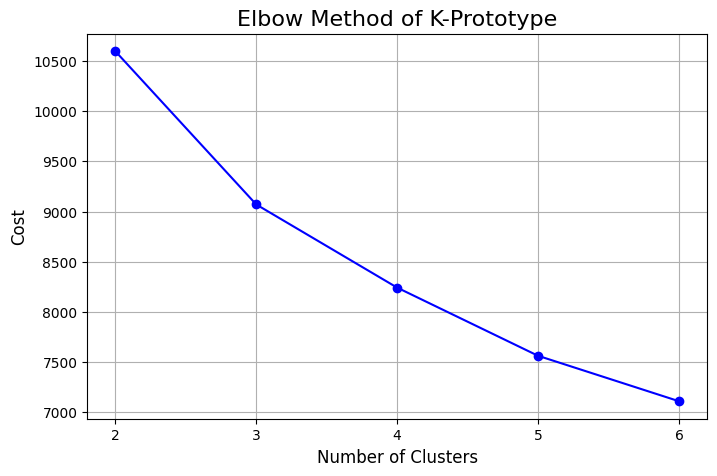

In [36]:
# Set the maximum number of clusters to try for K-Prototypes
max_clusters = 6  # Define the maximum number of clusters to evaluate (from 2 to max_clusters)

# Initialize an empty list to store the cost (inertia) for each number of clusters
cost = []  # The cost will measure the quality of clustering for each cluster count

# Loop over the range of possible cluster numbers to calculate the cost
for k in range(2, max_clusters + 1):  # Start from 2 clusters and loop to the max_clusters
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42, n_jobs=-1)  # Initialize K-Prototypes clustering
    kproto.fit_predict(HR_df_final, categorical=index_cat_columns)  # Fit the model and predict the clusters, specifying the categorical columns
    cost.append(kproto.cost_)  # Append the cost (inertia) of the current model to the cost list
    print('Cluster creation : ', k)  # Print the current number of clusters being evaluated

# Create the elbow plot to find the optimal number of clusters
plt.figure(figsize=(8, 5))  # Set the size of the plot

# Plot the number of clusters (x-axis) versus the cost (y-axis) to observe the elbow point
plt.plot(range(2, max_clusters + 1), cost, marker="o", linestyle='-', color='b')
plt.grid(True)  # Add gridlines to the plot
plt.title('Elbow Method of K-Prototype', fontsize=16)  # Set the title of the plot
plt.xlabel('Number of Clusters', fontsize=12)  # Label for the x-axis (number of clusters)
plt.ylabel('Cost', fontsize=12)  # Label for the y-axis (cost/inertia)
plt.xticks(range(2, max_clusters + 1))  # Set the ticks on the x-axis
plt.show()  # Display the plot


# Model Train

In [37]:
# Train the K-Prototypes model with the optimal number of clusters

# Initialize K-Prototypes with the optimal number of clusters (in this case, 3)
kp = KPrototypes(n_clusters=3, random_state=42)  # We use 3 clusters based on the elbow plot analysis

# Fit the model to the data and predict cluster labels
pred = kp.fit_predict(HR_df_final, categorical=index_cat_columns)  # Fit the model and assign each data point to a cluster

# Output the predicted cluster labels
pred  # Shows the predicted cluster labels for each data point in the dataset


array([1, 1, 2, ..., 2, 1, 2], dtype=uint16)

In [38]:
# Insert the clustering result into the original DataFrame (df1)

df1['cluster'] = pred  # Add a new column 'cluster' to df1 that contains the predicted cluster labels from K-Prototypes

df1  # Display the updated DataFrame with the cluster assignments


,Age,Attrition,Department,EducationField,JobInvolvement,JobLevel,JobRole,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,cluster
0,41,Yes,Sales,Life Sciences,3,2,Sales Executive,Single,5993,Yes,0,8,6,4,5,1
1,49,No,Research & Development,Life Sciences,2,2,Research Scientist,Married,5130,No,1,10,10,7,7,1
2,37,Yes,Research & Development,Other,2,1,Laboratory Technician,Single,2090,Yes,0,7,0,0,0,2
3,33,No,Research & Development,Life Sciences,3,1,Research Scientist,Married,2909,Yes,0,8,8,7,0,2
4,27,No,Research & Development,Medical,3,1,Laboratory Technician,Married,3468,No,1,6,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,Medical,4,2,Laboratory Technician,Married,2571,No,1,17,5,2,3,2
1466,39,No,Research & Development,Medical,2,3,Healthcare Representative,Married,9991,No,1,9,7,7,7,1
1467,27,No,Research & Development,Life Sciences,4,2,Manufacturing Director,Married,6142,Yes,1,6,6,2,3,2
1468,49,No,Sales,Medical,2,2,Sales Executive,Married,5390,No,0,17,9,6,8,1


In [39]:
# Check the unique cluster values in the 'cluster' column

df1['cluster'].unique()  # Returns an array of unique cluster labels present in the 'cluster' column


array([1, 2, 0], dtype=uint16)

## EDA for Clustering


### Create Variables for Each Cluster

In [40]:
# Filter rows where cluster is 0
df_cluster0 = df1[df1['cluster'] == 0]  # Select all rows from df1 where the 'cluster' column is 0

# Filter rows where cluster is 1
df_cluster1 = df1[df1['cluster'] == 1]  # Select all rows from df1 where the 'cluster' column is 1

# Filter rows where cluster is 2
df_cluster2 = df1[df1['cluster'] == 2]  # Select all rows from df1 where the 'cluster' column is 2


### Characteristics of Each Cluster

#### Central Tendency in Cluster 0

In [41]:
# Loop through all columns in df_cluster0
for i in df_cluster0.columns:
    # Print the column name
    print(i)  # This prints the name of the current column

    # Print the summary statistics of the column
    print(df_cluster0[i].describe())  # This provides statistical summaries like count, mean, std, min, max for numeric data, and frequency for categorical data

    # Print a separator line
    print("-" * 30)  # This prints a line of dashes to visually separate the output for each column


Age
count    220.000000
mean      48.272727
std        5.900869
min       33.000000
25%       43.000000
50%       49.000000
75%       53.000000
max       60.000000
Name: Age, dtype: float64
------------------------------
Attrition
count     220
unique      2
top        No
freq      204
Name: Attrition, dtype: object
------------------------------
Department
count                        220
unique                         3
top       Research & Development
freq                         149
Name: Department, dtype: object
------------------------------
EducationField
count               220
unique                6
top       Life Sciences
freq                 86
Name: EducationField, dtype: object
------------------------------
JobInvolvement
count    220.000000
mean       2.677273
std        0.695998
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: JobInvolvement, dtype: float64
------------------------------
JobLevel
count    220.00

#### Central Tendency in Cluster 1

In [42]:
# Loop through every column in df_cluster1
for i in df_cluster1.columns:
    # Print the column name
    print(i)  # This prints the name of the current column

    # Print the summary statistics of the column
    print(df_cluster1[i].describe())  # This provides statistical summaries like count, mean, std, min, max for numeric data, and frequency for categorical data

    # Print a separator line
    print("-" * 30)  # This prints a line of dashes to separate the output for each column


Age
count    426.000000
mean      36.340376
std        6.782962
min       25.000000
25%       31.000000
50%       35.000000
75%       40.000000
max       60.000000
Name: Age, dtype: float64
------------------------------
Attrition
count     426
unique      2
top        No
freq      379
Name: Attrition, dtype: object
------------------------------
Department
count                        426
unique                         3
top       Research & Development
freq                         260
Name: Department, dtype: object
------------------------------
EducationField
count               426
unique                6
top       Life Sciences
freq                179
Name: EducationField, dtype: object
------------------------------
JobInvolvement
count    426.000000
mean       2.793427
std        0.705977
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: JobInvolvement, dtype: float64
------------------------------
JobLevel
count    426.00

#### Central Tendency in Cluster 2

In [43]:
# Loop through every column in df_cluster2
for i in df_cluster2.columns:
    # Print the column name
    print(i)  # This prints the name of the current column

    # Print the summary statistics of the column
    print(df_cluster2[i].describe())  # This provides statistical summaries like count, mean, std, min, max for numeric data, and frequency for categorical data

    # Print a separator line
    print("-" * 30)  # This prints a line of dashes to separate the output for each column


Age
count    824.000000
mean      34.195388
std        8.595228
min       18.000000
25%       28.000000
50%       33.000000
75%       39.000000
max       60.000000
Name: Age, dtype: float64
------------------------------
Attrition
count     824
unique      2
top        No
freq      650
Name: Attrition, dtype: object
------------------------------
Department
count                        824
unique                         3
top       Research & Development
freq                         552
Name: Department, dtype: object
------------------------------
EducationField
count               824
unique                6
top       Life Sciences
freq                341
Name: EducationField, dtype: object
------------------------------
JobInvolvement
count    824.000000
mean       2.711165
std        0.717137
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: JobInvolvement, dtype: float64
------------------------------
JobLevel
count    824.00

| Metric                    | Cluster 0  | Cluster 1  | Cluster 2  |
|---------------------------|------------|------------|------------|
| **Age (mean)**             | 48.27      | 36.34      | 34.20      |
| **Attrition (No)**         | 204        | 379        | 650        |
| **Attrition (Yes)**        | 16         | 47         | 174        |
| **Department (R&D)**       | 149        | 260        | 552        |
| **Job Involvement (mean)** | 2.68       | 2.79       | 2.71       |
| **Job Level (mean)**       | 4.10       | 2.13       | 1.49       |
| **Marital Status (Married)**| 115       | 202        | 356        |
| **Monthly Income (mean)**  | 15561.35   | 6309.71    | 4184.32    |
| **OverTime (No)**          | 158        | 314        | 582        |
| **OverTime (Yes)**         | 62         | 112        | 242        |
| **Stock Option Level (mean)**| 0.75     | 0.87       | 0.76       |
| **Total Working Years (mean)**| 25.66   | 12.00      | 7.06       |
| **Years at Company (mean)**| 14.31      | 10.28      | 3.37       |
| **Years in Current Role (mean)**| 6.73  | 7.42       | 1.91       |
| **Years with Current Manager (mean)**| 6.40 | 7.35    | 1.85       |



 Karakteristik dari setiap Cluster yang telah diuraikan:

1. **Cluster 0**: **"Senior Staff"**  
   - Cluster ini terdiri dari karyawan yang lebih tua, berpengalaman, dan menduduki posisi lebih tinggi dengan pendapatan yang lebih besar. Mereka juga memiliki stabilitas yang tinggi dengan tingkat pengunduran diri yang rendah. Oleh karena itu, Cluster ini mencerminkan posisi mereka sebagai pemimpin senior dalam organisasi.

2. **Cluster 1**: **"Mid-Level Staff"**  
   - Cluster ini mencerminkan karyawan di tengah karir mereka, dengan pengalaman yang moderat dan keterlibatan kerja yang tinggi. Mereka memiliki pendapatan menengah dan lebih stabil daripada karyawan di Cluster 2. Cluster ini mencerminkan posisi mereka sebagai profesional berpengalaman namun belum mencapai puncak karir.

3. **Cluster 2**: **"Junior Staff"**  
   - Cluster ini terdiri dari karyawan yang lebih muda, berpendapatan lebih rendah, dan memiliki pengalaman kerja yang lebih sedikit. Tingkat pengunduran diri yang lebih tinggi dan lebih sering lembur menunjukkan bahwa mereka adalah tenaga kerja baru yang dinamis dan penuh semangat untuk berkembang. Cluster ini mencerminkan energi dan potensi mereka sebagai talenta baru dalam organisasi.

## Conclusion

Berikut adalah strategi bisnis yang lebih sederhana dan fokus untuk setiap cluster:

1. **Cluster 0: "Senior Staff"**
   - **Karakteristik**: Karyawan senior dengan pengalaman lama dan posisi tinggi.
   
   **Strategi**:
   - **Retensi**: Berikan fleksibilitas kerja dan tunjangan pensiun yang baik.
   - **Mentor**: Libatkan mereka dalam membimbing karyawan muda.
   - **Perencanaan Suksesi**: Siapkan pengganti untuk posisi strategis mereka saat pensiun.


2. **Cluster 1: "Mid-Level Staff"**
   - **Karakteristik**: Karyawan menengah dengan pengalaman dan stabilitas moderat.
   
   **Strategi**:
   - **Pengembangan Karir**: Sediakan pelatihan untuk peningkatan keterampilan dan promosi.
   - **Keseimbangan Kerja**: Tawarkan fleksibilitas waktu kerja untuk menjaga keseimbangan hidup.
   - **Insentif**: Berikan bonus atau penghargaan untuk meningkatkan motivasi.


3. **Cluster 2: "Junior Staff"**
   - **Karakteristik**: Karyawan muda dengan pengalaman minim dan potensi tinggi.
   
   **Strategi**:
   - **Pelatihan Intensif**: Sediakan program pelatihan yang jelas sejak awal.
   - **Jalur Karir**: Buat jalur karir yang menarik untuk mengurangi turnover.
   - **Pengakuan Kinerja**: Berikan bonus atau penghargaan berdasarkan prestasi untuk memotivasi.


Strategi Umum:
   - **Teknologi**: Gunakan teknologi untuk meningkatkan kolaborasi dan efisiensi.
   - **Fleksibilitas Kerja**: Tawarkan opsi kerja fleksibel bagi semua karyawan.
   - **Kesejahteraan Karyawan**: Fokus pada program kesehatan fisik dan mental untuk semua.
